In [1]:
import import_ipynb
import Scanpy_functions_v03262021 as sc_pipe
import scvelo as scv
scv.logging.print_version()
import warnings
import scirpy as ir
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import bbknn
import logging
from sklearn.mixture import GaussianMixture
from scipy.stats     import norm
import glob
import os
import hvplot.pandas
import docx
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from scipy import sparse
import scanpy.external as sce
import holoviews as hv
import panel as pn
import bokeh
from bokeh.resources import INLINE
import scanorama
import gseapy

importing Jupyter notebook from Scanpy_functions_v03262021.ipynb
Running scvelo 0.2.3 (python 3.8.5) on 2022-02-22 14:43.
Running scvelo 0.2.3 (python 3.8.5) on 2022-02-22 14:43.


In [2]:
# define sample metadata. Usually read from a file.
exclude_genes = ['Rpl', 'Rps', 'Trav', 'Traj', 'Trbj', 'Trbv','Mrp','Fau','Dap3','Uba52','Ighv', 'Igkv', 'Iglv']


In_path = '/user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/'

out_path = '/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/'

In [3]:
#sc.set_figure_params(scanpy=True, dpi=200,  figsize=[12.8,9.6])
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization


In [4]:
out_path = '/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/cellphonedb/human_sub'

In [5]:
sub =sc.read_h5ad(out_path+'/sub_velocity_human.h5ad')

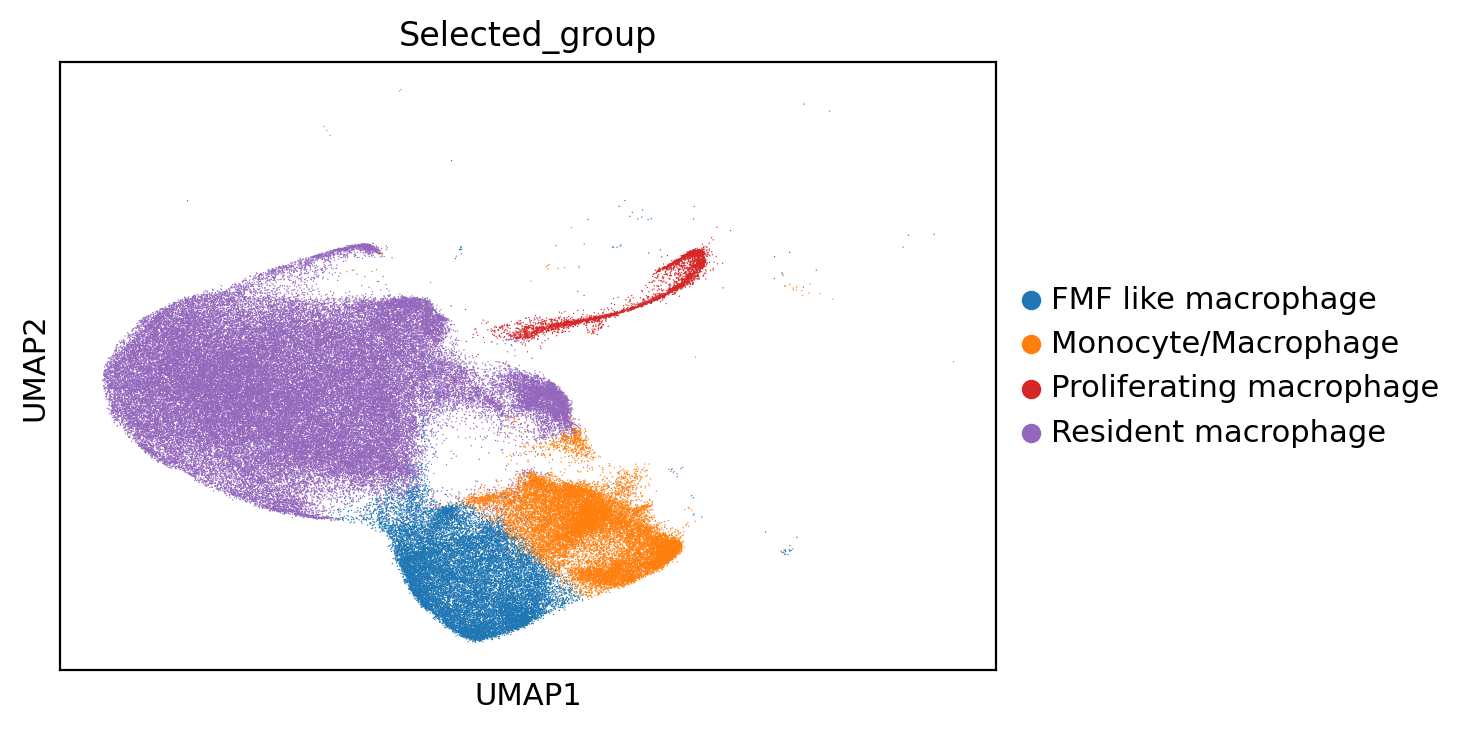

In [9]:
sc.pl.umap(sub, color = 'Selected_group')

In [10]:
sc.pp.neighbors(sub)

computing neighbors
    finished (0:00:33) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:01:08) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 20/352 cores)


  0%|          | 0/127 [00:00<?, ?gene/s]

    finished (0:54:23) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:01:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:35) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
calculating cell cycle phase
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


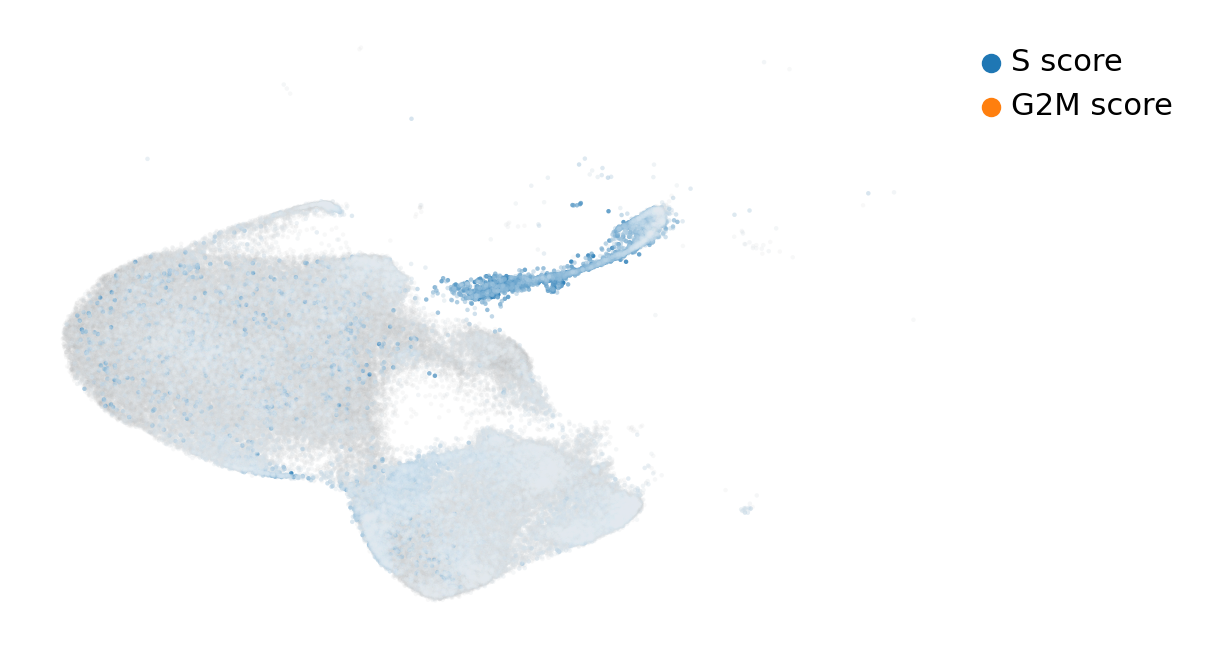

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


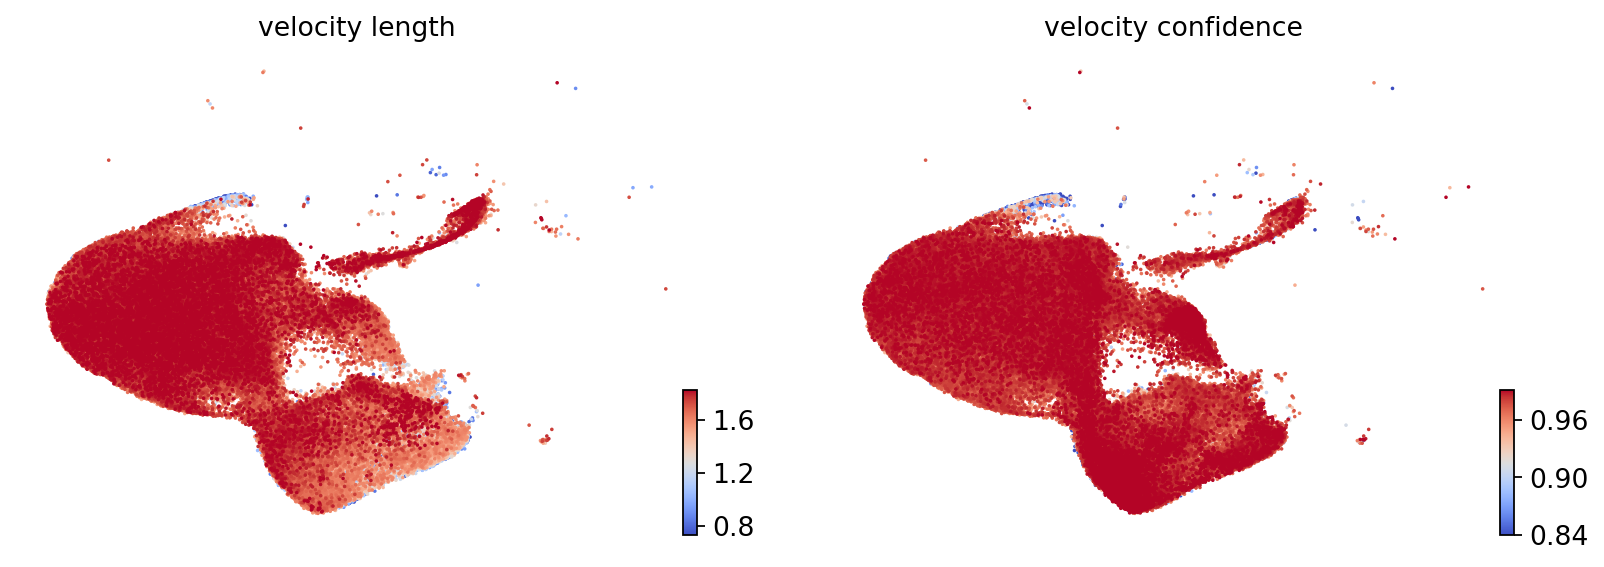

computing velocity embedding
    finished (0:01:02) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


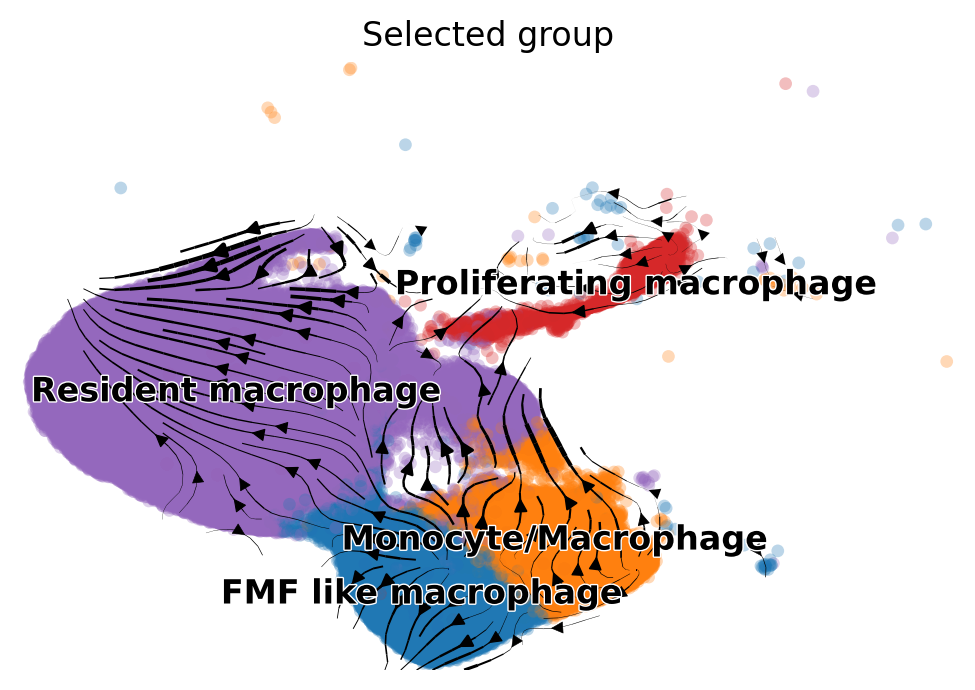

In [11]:
scv.pp.moments(sub, n_pcs=20, n_neighbors=20)
scv.tl.recover_dynamics(sub,n_jobs=20)
scv.tl.velocity(sub, mode='dynamical')
scv.tl.velocity_graph(sub)
scv.tl.score_genes_cell_cycle(sub)
scv.pl.scatter(sub, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])
scv.tl.velocity_confidence(sub)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(sub, c=keys, cmap='coolwarm', perc=[5, 95])
#scv.pl.paga(adata, basis='umap', size=50, alpha=.1,min_edge_width=2, node_size_scale=0.5)
scv.pl.velocity_embedding_stream(sub, basis='umap',color ='Selected_group')

In [12]:
sub

AnnData object with n_obs × n_vars = 128939 × 27210
    obs: 'Sample', 'batch', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'predicted_doublet', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log_counts', 'Cell_Type', 'condition', 'SatM_like', 'human_clusters', 'Selected_group', 'Defined_groups', 'velocity_self_transition', 'S_score', 'G2M_score', 'phase', 'clusters_gradients', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'fit_r2', 'fit_alpha',

computing terminal states
    identified 10 regions of root cells and 5 regions of end points .
    finished (0:04:16) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:02:38) --> added 
    'latent_time', shared time (adata.obs)


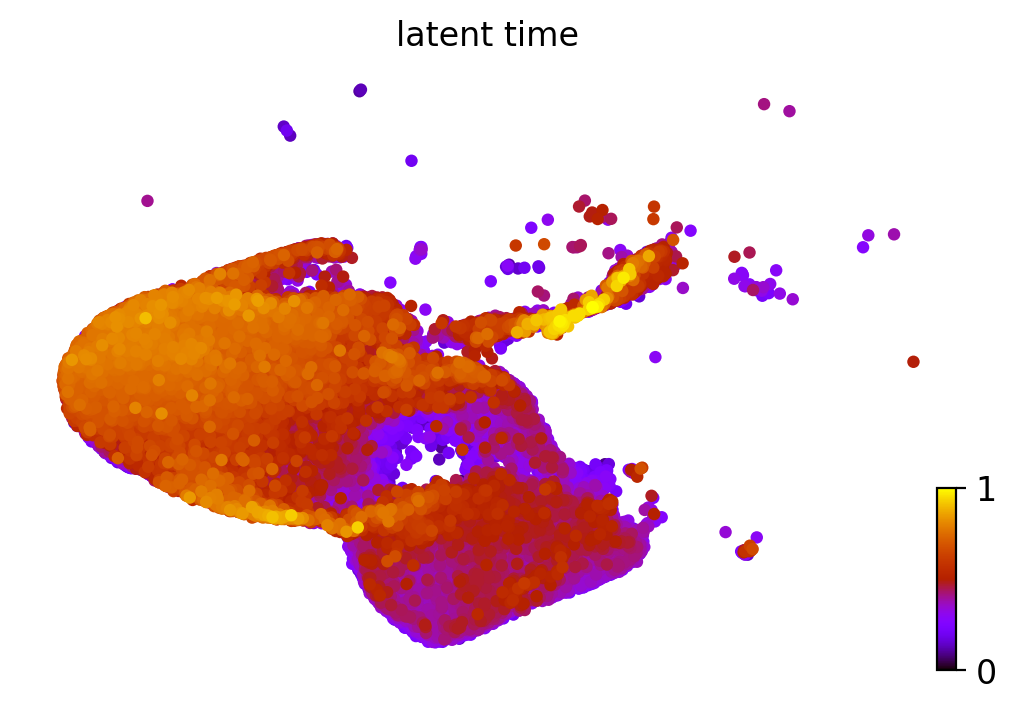

In [13]:
scv.tl.latent_time(sub)
scv.pl.scatter(sub, color='latent_time', color_map='gnuplot', size=80)
top_genes = sub.var['fit_likelihood'].sort_values(ascending=False).index[:50]



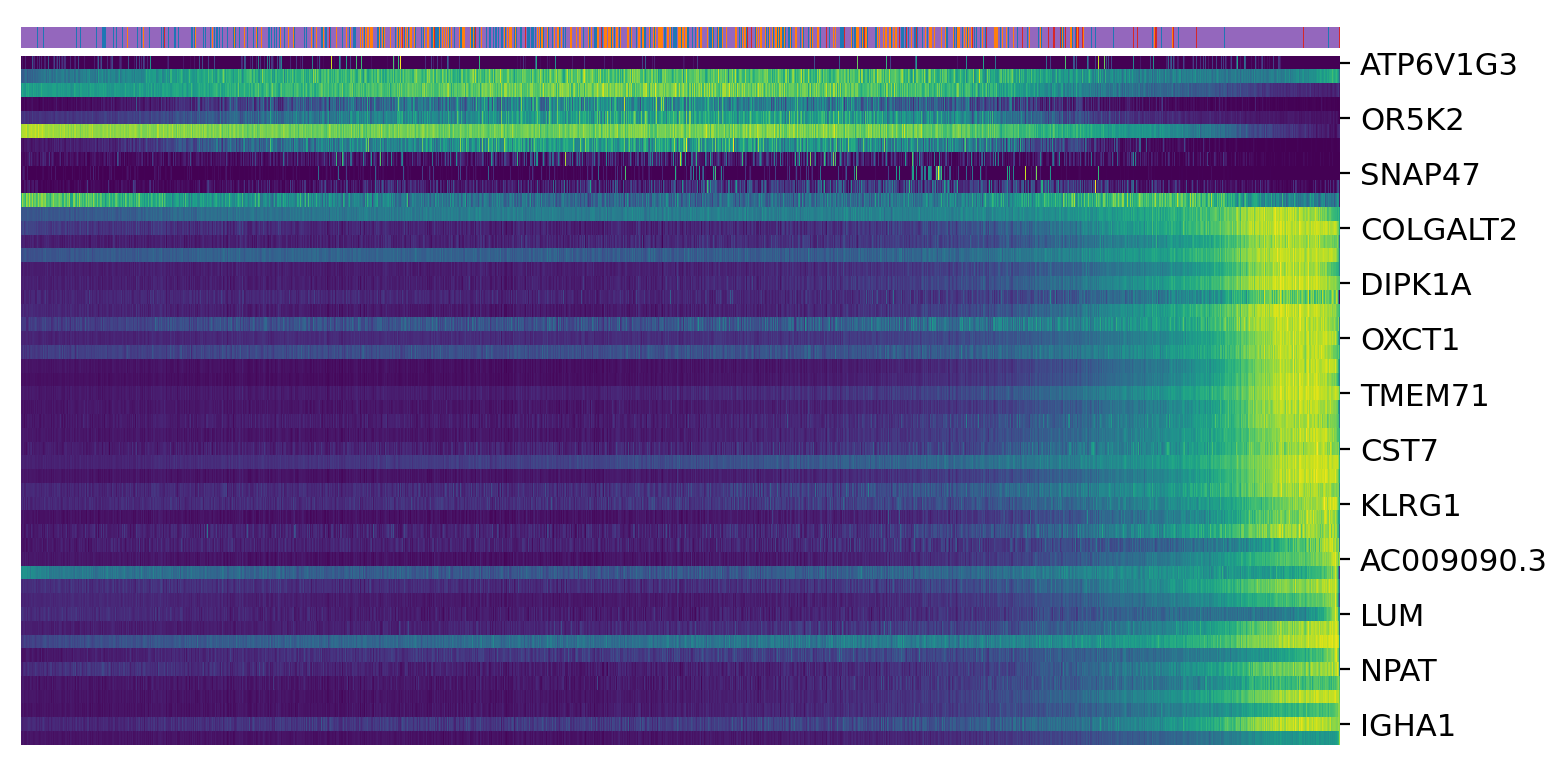

In [14]:
scv.pl.heatmap(sub, var_names=top_genes, sortby='latent_time', col_color='Selected_group', n_convolve=100)

running PAGA using priors: ['latent_time']
    finished (0:00:39) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


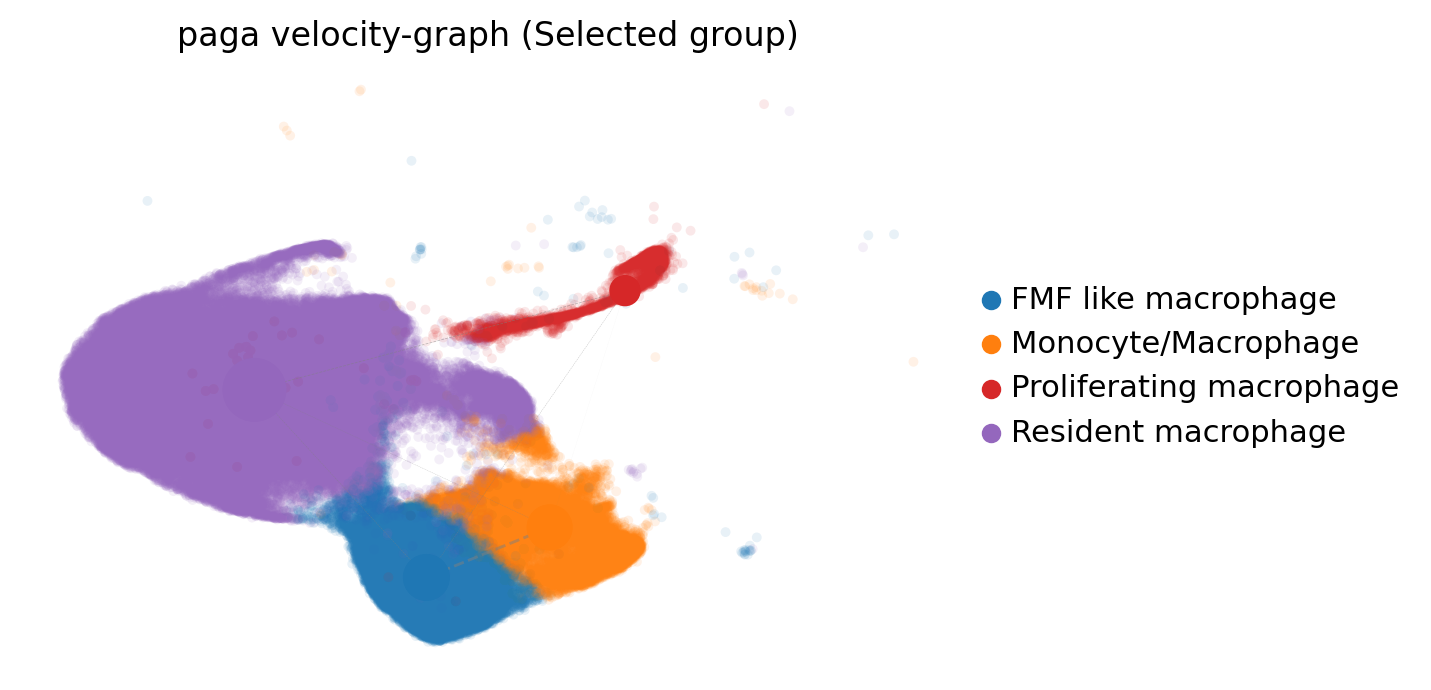

In [15]:
scv.tl.paga(sub, groups='Selected_group',use_time_prior='latent_time')
scv.pl.paga(sub, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

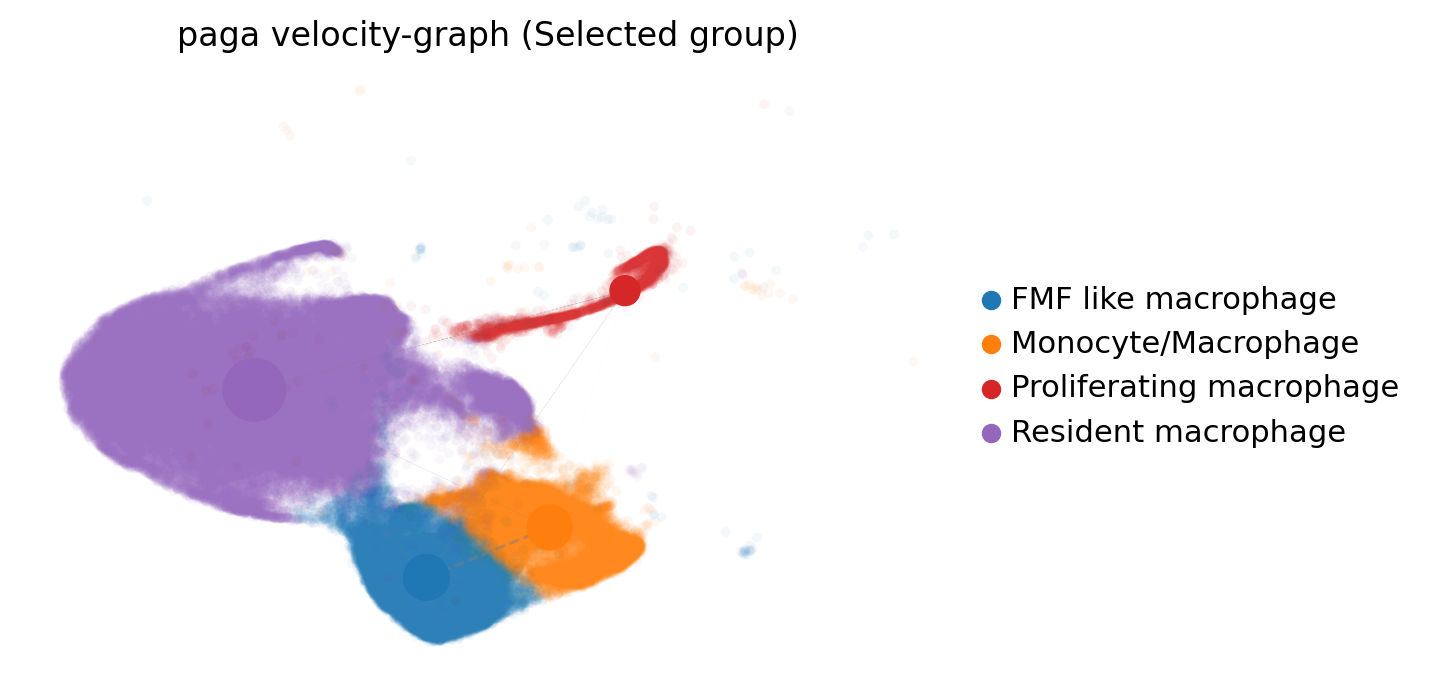

In [16]:
scv.pl.paga(sub, basis='umap', size=50, alpha=.05,threshold=0,
            min_edge_width=2, node_size_scale=1.5)

In [17]:
sub.obs

Sample batch  pct_counts_mt  pct_counts_ribo  \
AAACCTGAGAGTGAGA-1-0   BAL_TY-09     0       0.007648         0.075828   
AAACCTGAGATGTAAC-1-0   BAL_TY-09     0       0.008752         0.088691   
AAACCTGAGCGATAGC-1-0   BAL_TY-09     0       0.064140         0.036443   
AAACCTGAGCGCCTCA-1-0   BAL_TY-09     0       0.005269         0.053741   
AAACCTGAGGTAGCCA-1-0   BAL_TY-09     0       0.005669         0.142180   
...                          ...   ...            ...              ...   
TTTGGTTGTTTGTTGG-1-18   BAL_TY-8    18       0.029132         0.168356   
TTTGTCACAGACACTT-1-18   BAL_TY-8    18       0.006641         0.096923   
TTTGTCACATGTTCCC-1-18   BAL_TY-8    18       0.045735         0.077717   
TTTGTCATCGTGGACC-1-18   BAL_TY-8    18       0.030738         0.086428   
TTTGTCATCTGAGGGA-1-18   BAL_TY-8    18       0.047681         0.114055   

                       pct_counts_hb  doublet_score predicted_doublet  \
AAACCTGAGAGTGAGA-1-0             0.0       0.009766             False   
AAACCTGAGATGTAAC-1-0             0.0       0.009192             False   
AAACCTGAGCGATAGC-1-0             0.0       0.016340             False   
AAACCTGAGCGCCTCA-1-0             0.0       0.006731             False   
AAACCTGAGGTAGCCA-1-0             0.0       0.026178             False   
...                              ...            ...               ...   
TTTGGTTGTTTGTTGG-1-18            0.0       0.027286             False   
TTTGTCACAGACACTT-1-18            0.0       0.119635             False   
TTTGTCACATGTTCCC-1-18            0.0       0.022634             False   
TTTGTCATCGTGGACC-1-18            0.0       0.059112             False   
TTTGTCATCTGAGGGA-1-18            0.0       0.041563             False   

                       n_counts  n_genes  n_genes_by_counts  ...  G2M_score  \
AAACCTGAGAGTGAGA-1-0    24582.0     4700               4700  ...  -0.299669   
AAACCTGAGATGTAAC-1-0    14511.0     3341               3341  ...  -0.288526   
AAACCTGAGCGATAGC-1-0      686.0      523                523  ...   0.039748   
AAACCTGAGCGCCTCA-1-0     1898.0     1012               1012  ...  -0.272957   
AAACCTGAGGTAGCCA-1-0     8644.0     2649               2649  ...  -0.176140   
...                         ...      ...                ...  ...        ...   
TTTGGTTGTTTGTTGG-1-18   15687.0     3705               3705  ...  -0.213180   
TTTGTCACAGACACTT-1-18   42611.0     5547               5547  ...  -0.240975   
TTTGTCACATGTTCCC-1-18   27703.0     4370               4370  ...  -0.277466   
TTTGTCATCGTGGACC-1-18   37673.0     5199               5199  ...  -0.297053   
TTTGTCATCTGAGGGA-1-18   38569.0     5260               5260  ...  -0.294326   

                       phase  clusters_gradients  velocity_length  \
AAACCTGAGAGTGAGA-1-0      G1             S_score             1.56   
AAACCTGAGATGTAAC-1-0      G1             S_score             1.50   
AAACCTGAGCGATAGC-1-0       S             S_score             0.94   
AAACCTGAGCGCCTCA-1-0      G1             S_score             0.81   
AAACCTGAGGTAGCCA-1-0      G1             S_score             1.57   
...                      ...                 ...              ...   
TTTGGTTGTTTGTTGG-1-18     G1             S_score             1.74   
TTTGTCACAGACACTT-1-18     G1             S_score             1.67   
TTTGTCACATGTTCCC-1-18     G1             S_score             1.79   
TTTGTCATCGTGGACC-1-18     G1             S_score             1.51   
TTTGTCATCTGAGGGA-1-18     G1             S_score             1.67   

                       velocity_confidence  velocity_confidence_transition  \
AAACCTGAGAGTGAGA-1-0              0.993012                        0.861494   
AAACCTGAGATGTAAC-1-0              0.992410                        0.777589   
AAACCTGAGCGATAGC-1-0              0.794444                        0.114335   
AAACCTGAGCGCCTCA-1-0              0.939109                        0.824288   
AAACCTGAGGTAGCCA-1-0              0.991134                        0.929739   
...           

running PAGA using priors: ['latent_time']
    finished (0:00:41) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


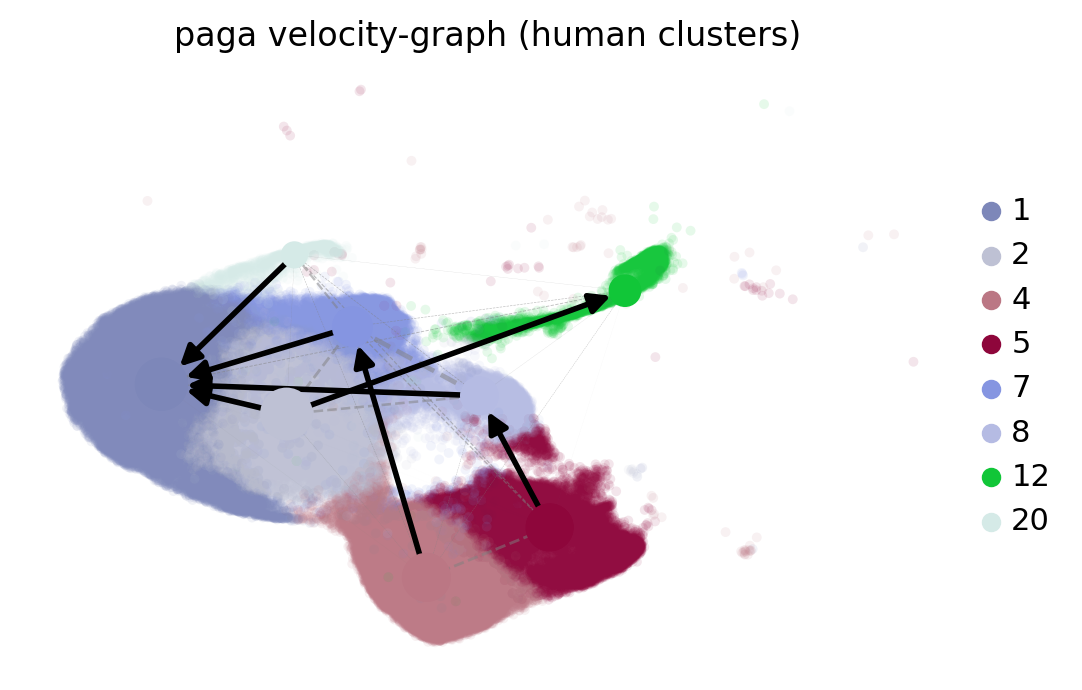

In [18]:
scv.tl.paga(sub, groups='human_clusters',use_time_prior='latent_time')
scv.pl.paga(sub, basis='umap', size=50, alpha=.1,threshold=0,
            min_edge_width=2, node_size_scale=1.5)

In [27]:
sub.obs['Defined_groups'].cat.remove_unused_categories()

AAACCTGAGAGTGAGA-1-0        Resident macrophage
AAACCTGAGATGTAAC-1-0        FMF like macrophage
AAACCTGAGCGATAGC-1-0                     B cell
AAACCTGAGCGCCTCA-1-0     Intersitial macrophage
AAACCTGAGGTAGCCA-1-0        Monocyte/macrophage
                                  ...          
TTTGGTTGTTTGTTGG-1-18        Ly6c high monocyte
TTTGTCACAGACACTT-1-18       FMF like macrophage
TTTGTCACATGTTCCC-1-18       FMF like macrophage
TTTGTCATCGTGGACC-1-18       FMF like macrophage
TTTGTCATCTGAGGGA-1-18       FMF like macrophage
Name: Defined_groups, Length: 128939, dtype: category
Categories (19, object): ['B cell', 'BAL SatM like cell', 'Endothelial cells', 'FMF like macrophage', ..., 'T cell', 'Type1 and regenerative epithelium', 'cDC', 'pDC']

In [28]:
sub.obs['Defined_groups'].value_counts()

FMF like macrophage                  87577
Intersitial macrophage               12498
Resident macrophage                  10731
Ly6c high monocyte                    8753
BAL SatM like cell                    3742
Monocyte/macrophage                   1392
cDC                                   1199
Ly6c low monocyte                     1132
B cell                                 626
Neutrophil                             418
Others                                 295
Lung SatM like cell                    161
Endothelial cells                      146
Fibroblast                             109
Type1 and regenerative epithelium       65
T cell                                  54
pDC                                     20
Smooth muscle cell                      18
NK cell                                  3
Name: Defined_groups, dtype: int64

In [21]:
del sub.obs['predicted_doublet']
sub.write_h5ad(out_path+'/sub_velocity_human.h5ad')

In [34]:
sub =sc.read_h5ad(out_path+'/sub_velocity_human.h5ad')

In [35]:
sub.obs['Selected_group'].to_csv(out_path+'/human_meta.tsv',sep="\t")

In [6]:
import itertools

In [7]:
def Plot_cluster_pair(combo,cpdb_mean):
    a =combo[0]+'|'+combo[1]
    b =combo[1]+'|'+combo[0]
    x = cpdb_mean[pd.notna(cpdb_mean[a])][['interacting_pair',a]]
    new = x['interacting_pair'].str.split("_", n=1 ,expand = True)
    x[combo[0]] = new[0]
    x[combo[1]] = new[1]
    y=x.pivot_table(columns=combo[0], index=combo[1], values=a)
    x = cpdb_mean[pd.notna(cpdb_mean[b])][['interacting_pair',b]]
    new = x['interacting_pair'].str.split("_", n=1 ,expand = True)
    x[combo[1]] = new[0]
    x[combo[0]] = new[1]
    z=x.pivot_table(columns=combo[1], index=combo[0], values=b)
    fig, axs = plt.subplots(1,2,figsize=(25,10))
    fig.suptitle('Cell Cell Communication between '+combo[0]+' and '+combo[1])
    axs[0].set_title(combo[0]+' to '+combo[1])
    sb.heatmap(y,ax=axs[0],linewidths=0.5,xticklabels=1, yticklabels=1)
    axs[1].set_title(combo[1]+' to '+combo[0])
    sb.heatmap(z,ax=axs[1],linewidths=0.5,xticklabels=1, yticklabels=1)

In [8]:
cpdb_mean = pd.read_csv(out_path +'/out/significant_means.txt',sep='\t')

In [12]:
cpdb_mean 

id_cp_interaction   interacting_pair             partner_a  \
0      CPI-SS008EB600F          CCR2_CCL7         simple:P41597   
1      CPI-SS079728E8B     ADORA2B_ENTPD1         simple:P29275   
2      CPI-SS0747FCACD       CXCL11_ACKR3         simple:O14625   
3      CPI-SS0C98C08DA         CCR2_CCL13         simple:P41597   
4      CPI-SC0B4D7E0FF   FN1_a4b7 complex         simple:P02751   
...                ...                ...                   ...   
1175   CPI-CS0CFA0E4C5  BMPR1A_BMPR2_GDF7  complex:BMPR1A_BMPR2   
1176   CPI-CS0E997FABD   BMR1B_AVR2B_BMP4   complex:BMR1B_AVR2B   
1177   CPI-CS02957B1BF   BMR1B_AVR2A_BMP4   complex:BMR1B_AVR2A   
1178   CPI-CS0BDA0D08C   BMR1B_AVR2A_GDF7   complex:BMR1B_AVR2A   
1179   CPI-SS0FF51A757   TNFSF18_TNFRSF18         simple:Q9UNG2   

                 partner_b   gene_a    gene_b  secreted  receptor_a  \
0            simple:P80098     CCR2      CCL7      True        True   
1            simple:P49961  ADORA2B    ENTPD1     False        True   
2            simple:P25106   CXCL11     ACKR3      True       False   
3            simple:Q99616     CCR2     CCL13      True        True   
4     complex:a4b7 complex      FN1       NaN      True       False   
...                    ...      ...       ...       ...         ...   
1175         simple:Q7Z4P5      NaN      GDF7      True        True   
1176         simple:P12644      NaN      BMP4      True        True   
1177         simple:P12644      NaN      BMP4      True        True   
1178         simple:Q7Z4P5      NaN      GDF7      True        True   
1179         simple:Q9Y5U5  TNFSF18  TNFRSF18      True       False   

      receptor_b      annotation_strategy  ...  \
0          False                  curated  ...   
1          False                  curated  ...   
2           True  guidetopharmacology.org  ...   
3          False                  curated  ...   
4          False                  curated  ...   
...          ...                      ...  ...   
1175       False                  curated  ...   
1176       False                  curated  ...   
1177       False                  curated  ...   
1178       False                  curated  ...   
1179        True                  curated  ...   

      Monocyte/Macrophage|Proliferating macrophage  \
0                                              NaN   
1                                              NaN   
2                                            0.694   
3                                              NaN   
4                                              NaN   
...                                            ...   
1175                                           NaN   
1176                                           NaN   
1177                                           NaN   
1178                                           NaN   
1179                                           NaN   

      Monocyte/Macrophage|Resident macrophage  \
0                                         NaN   
1                                         NaN   
2                                       0.784   
3                                         NaN   
4                                         NaN   
...                                       ...   
1175                                      NaN   
1176                                      NaN   
1177                                      NaN   
1178                                      NaN   
1179                                      NaN   

      Proliferating macrophage|FMF like macrophage  \
0                                              NaN   
1                                            0.415   
2                                              NaN   
3                                              NaN   
4                                              NaN   
...                                            ...   
1175                                           NaN   
1176                                           NaN   
1177                  

## Interaction of Defined Groups 

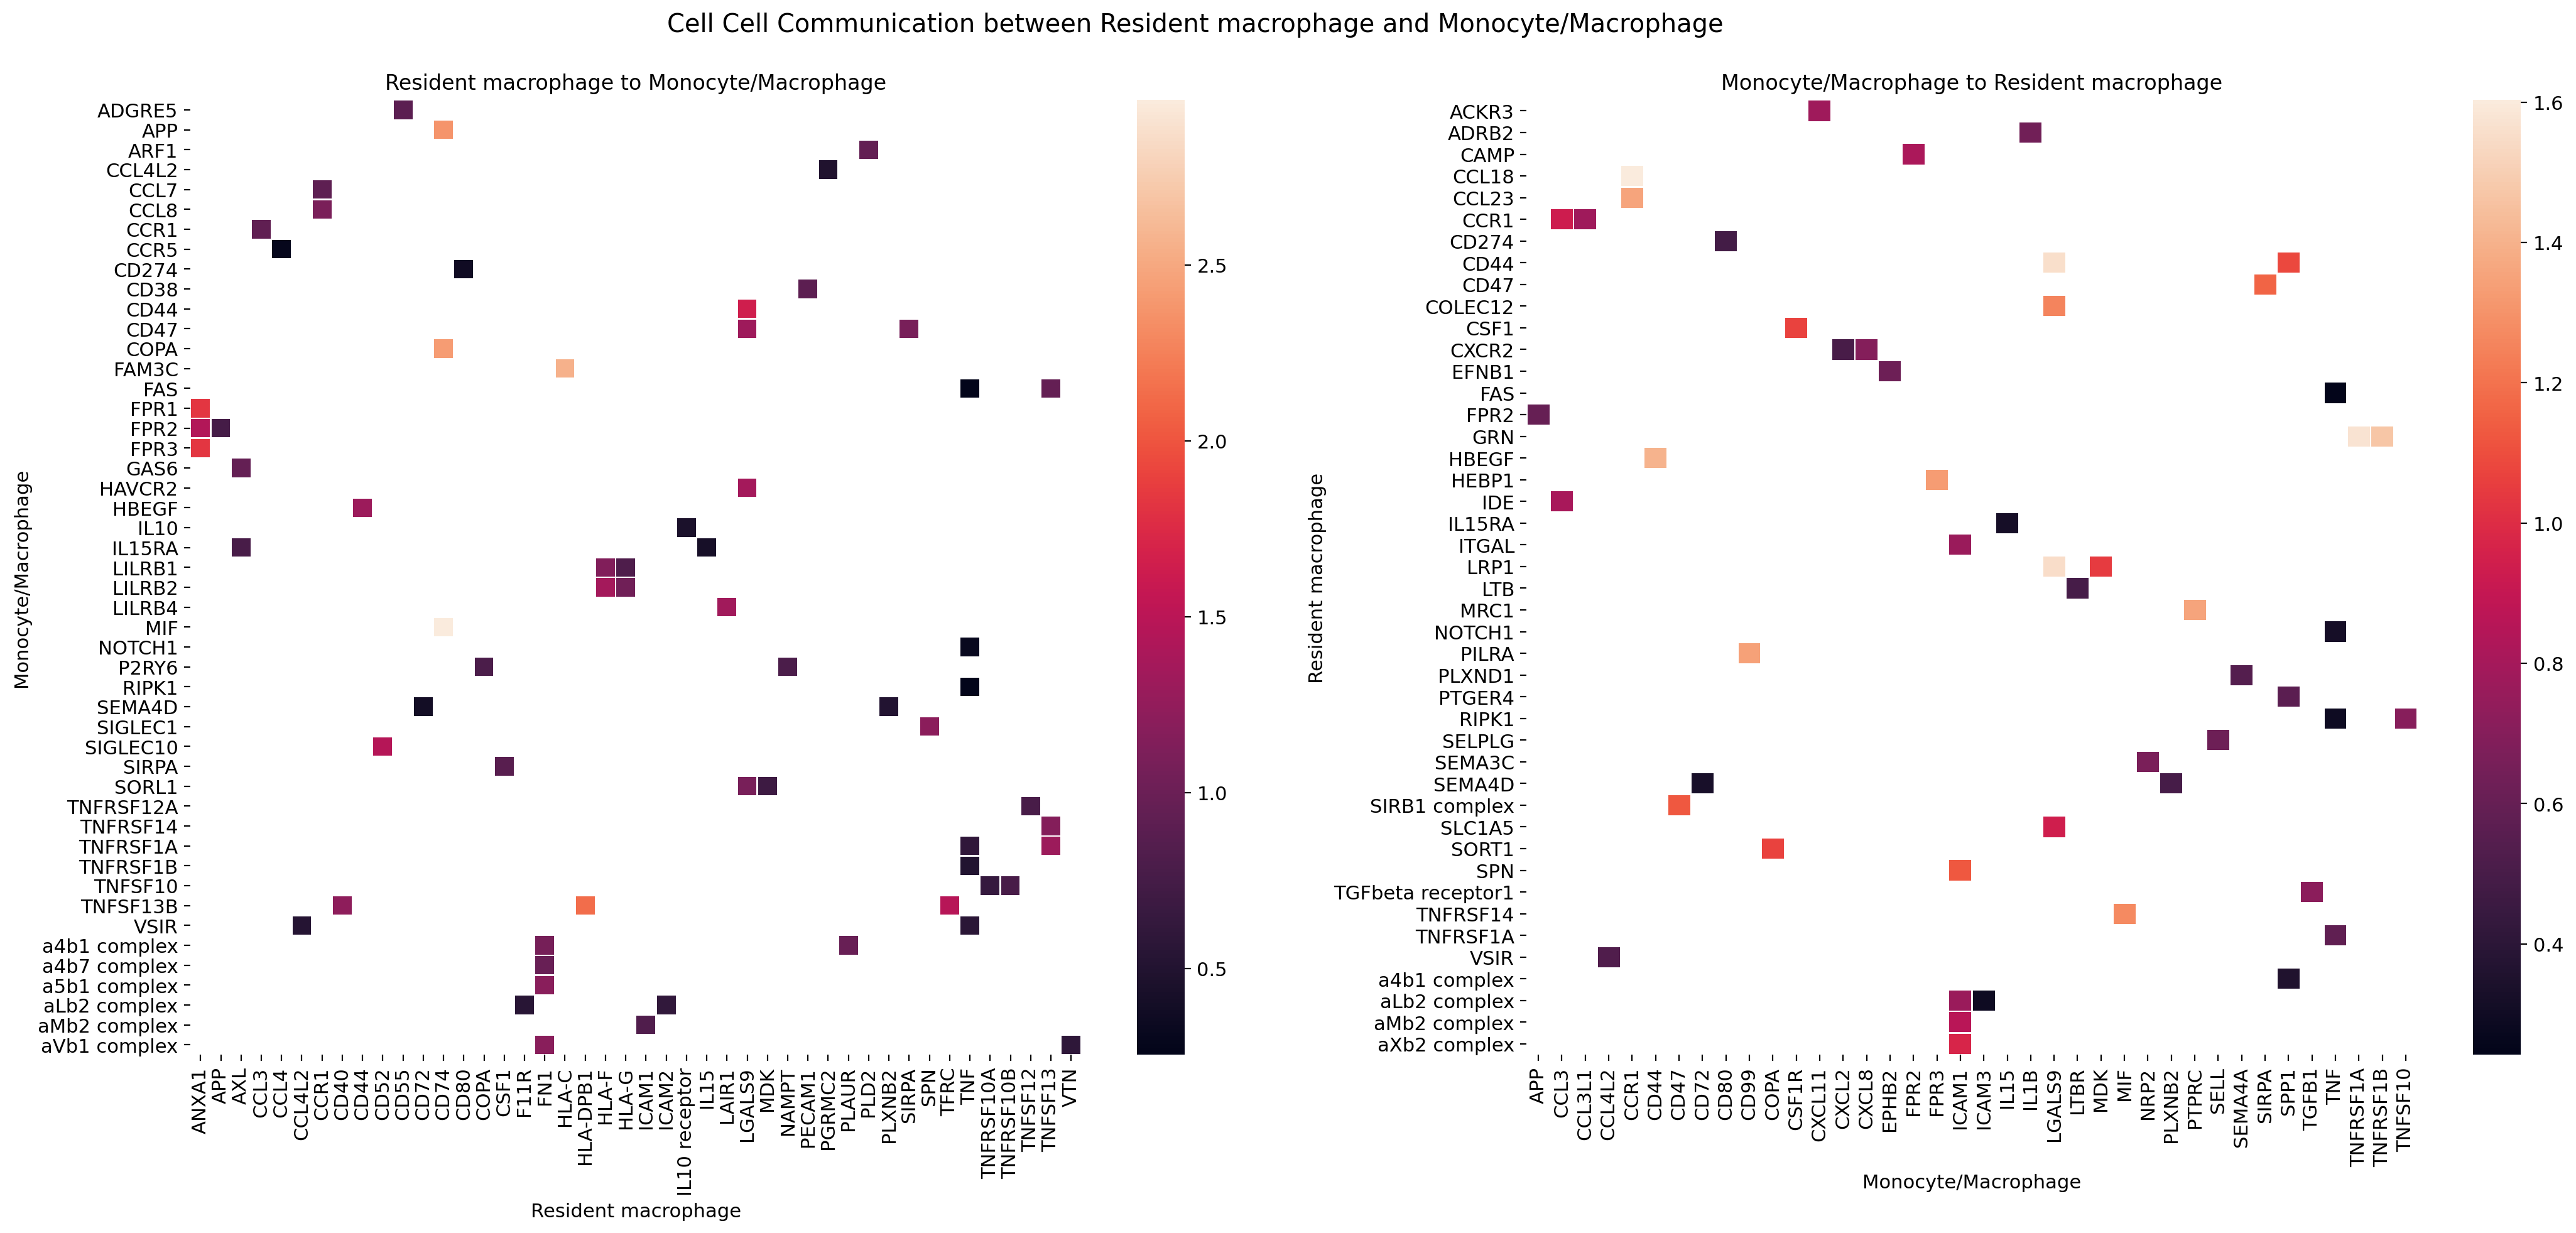

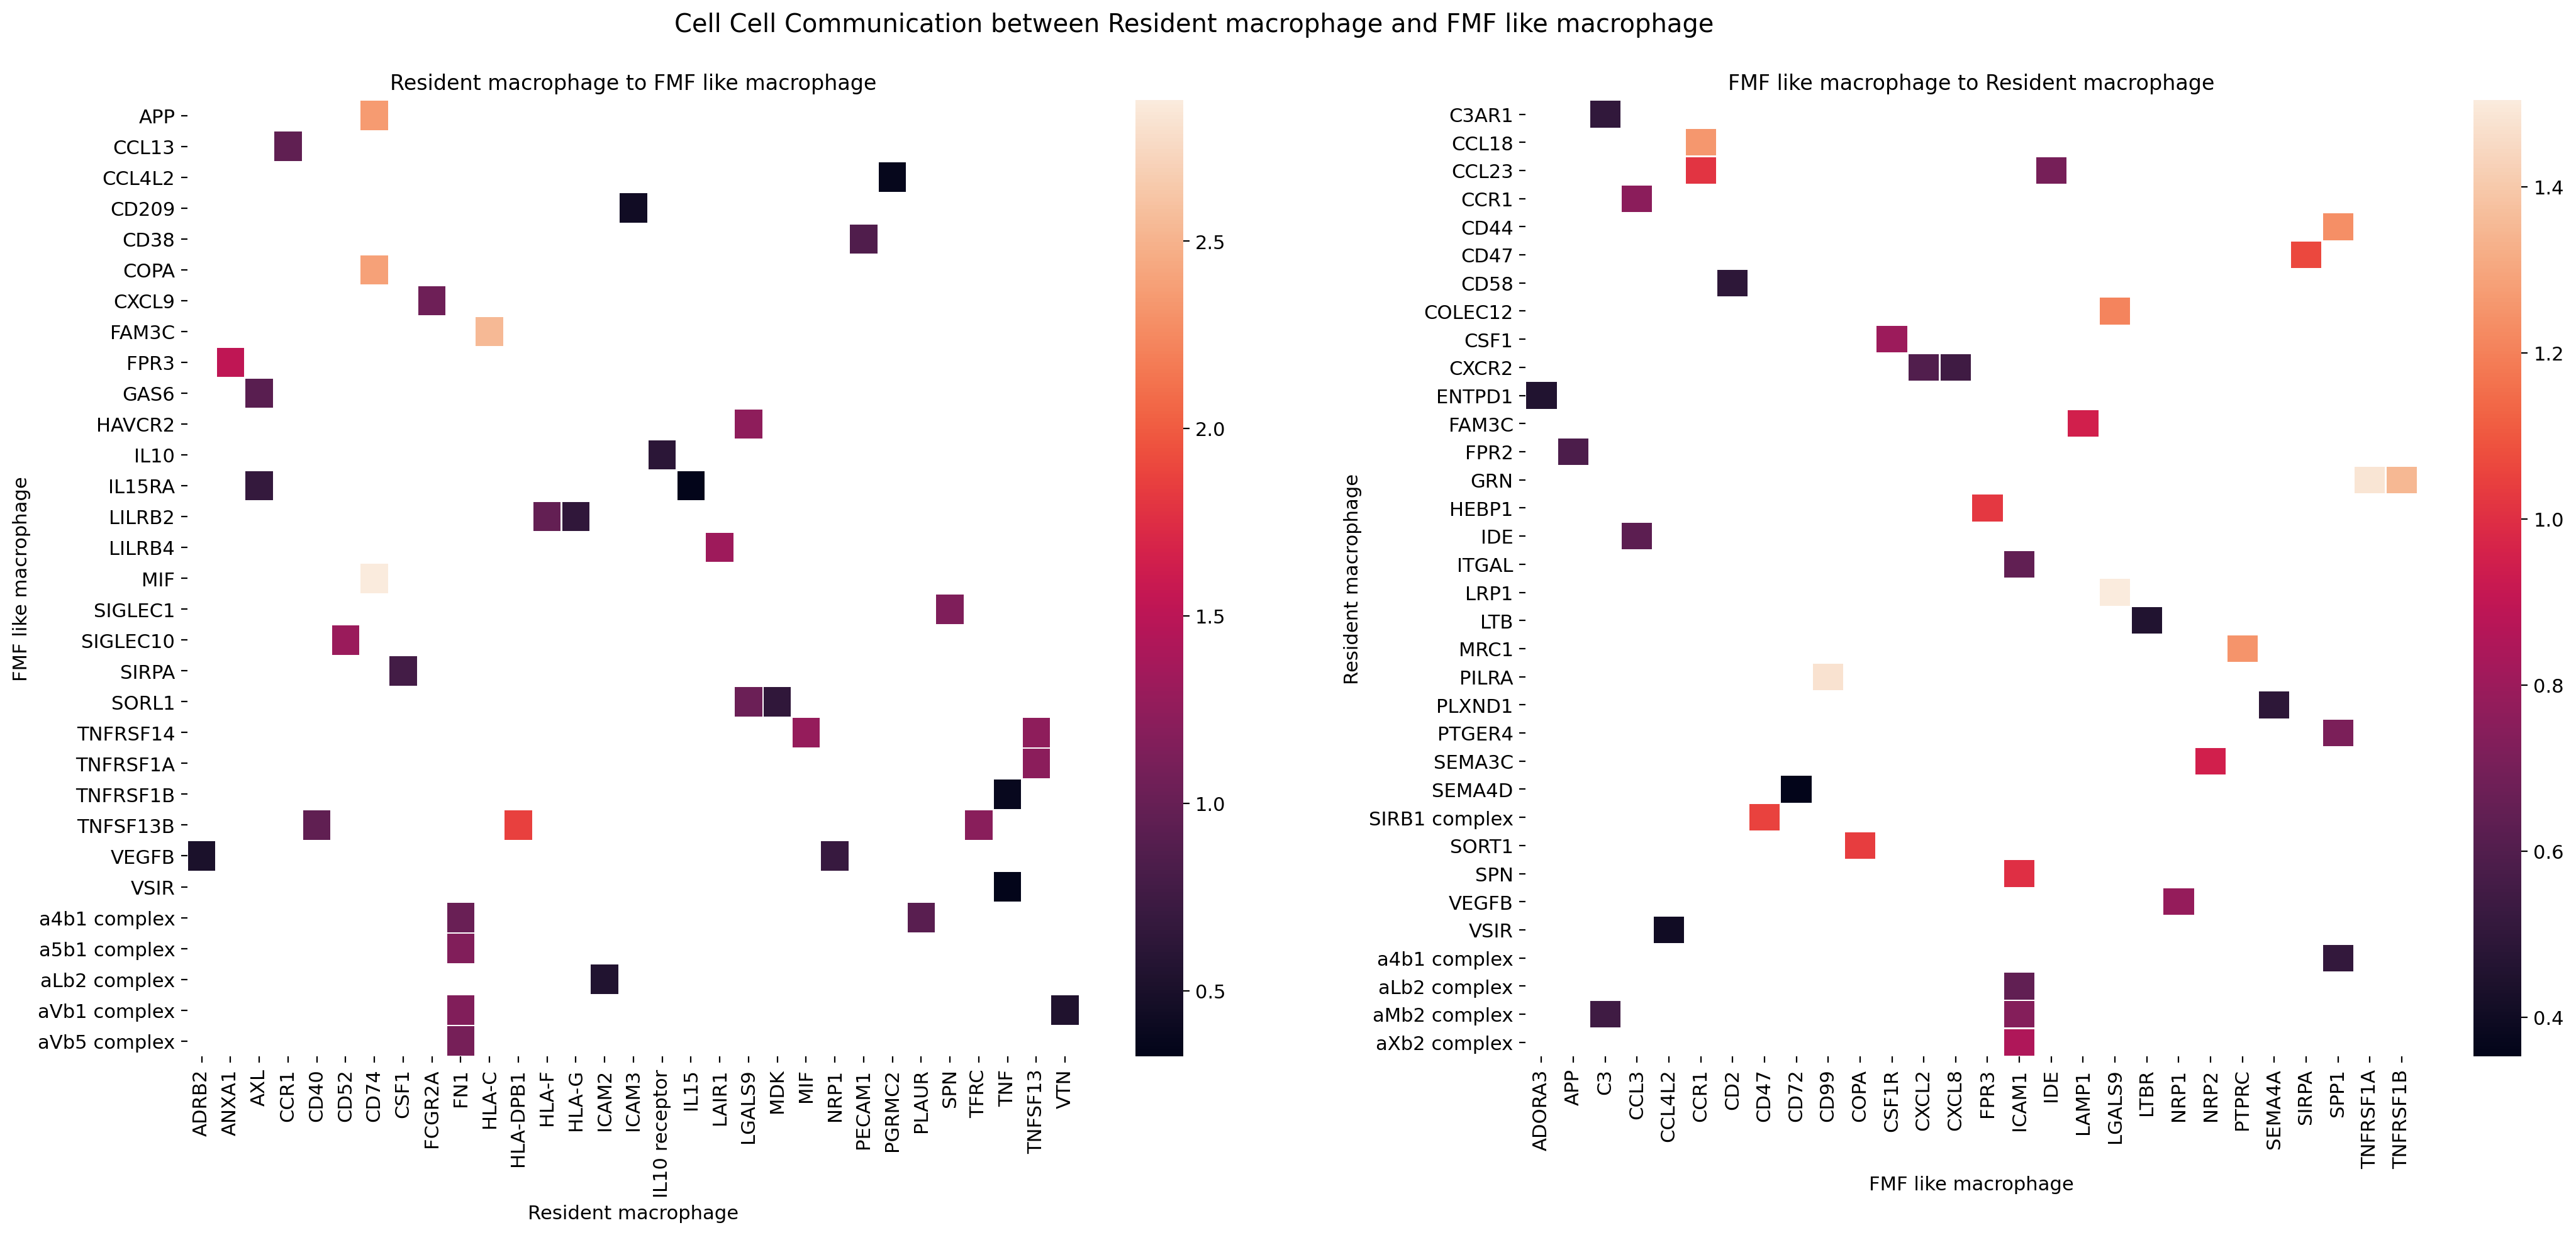

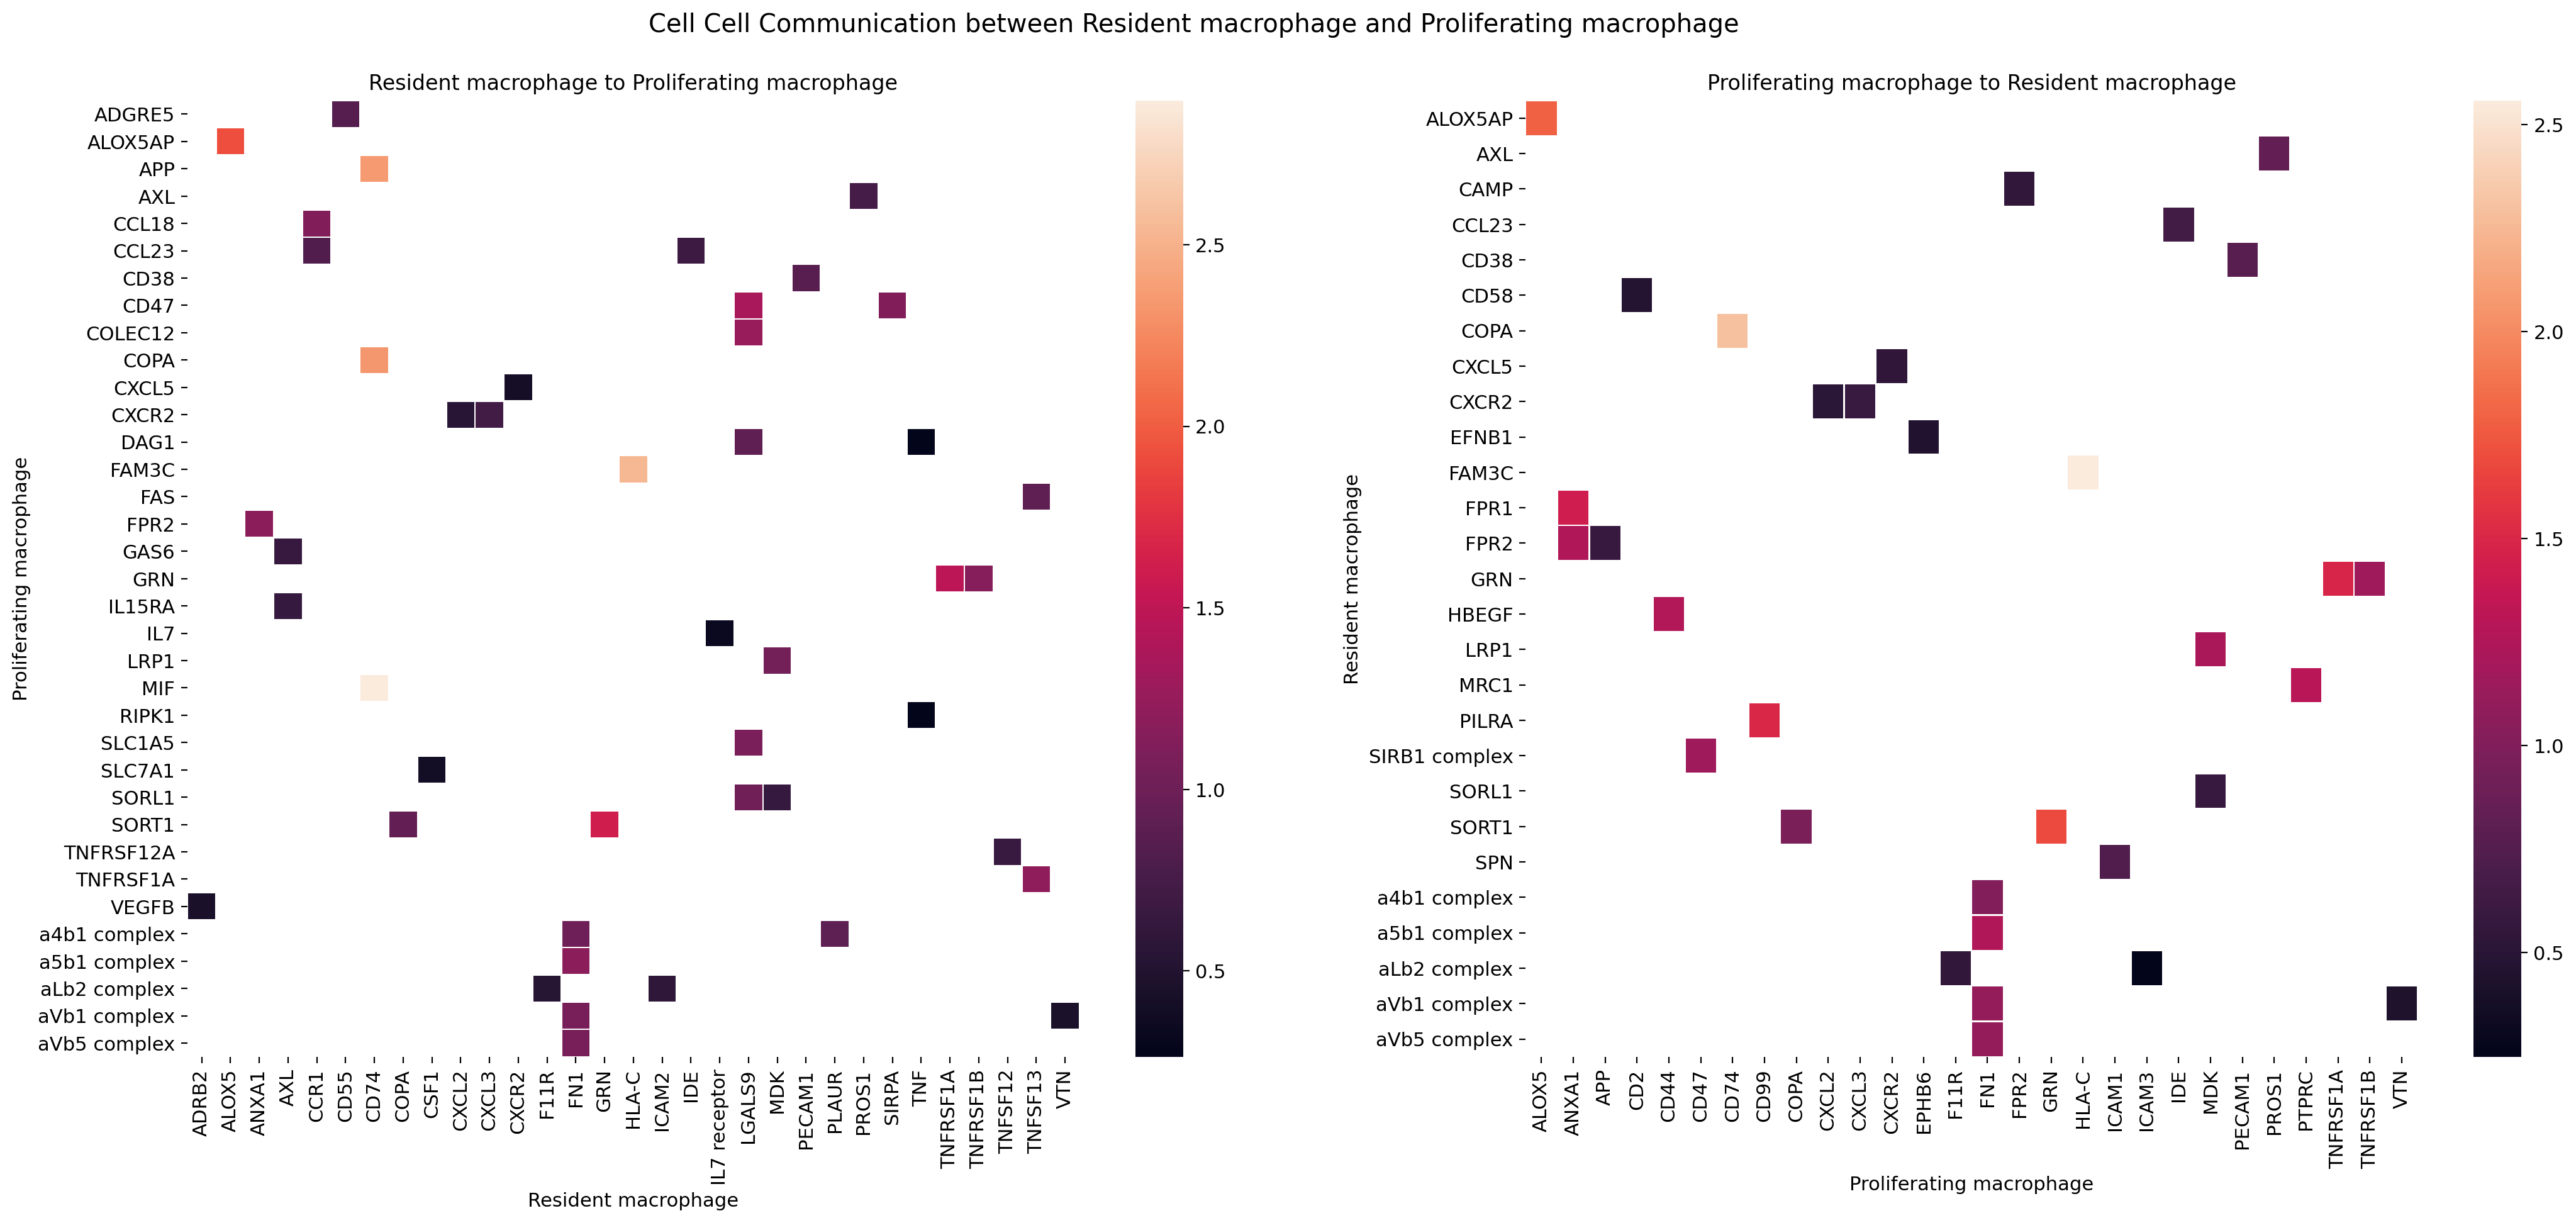

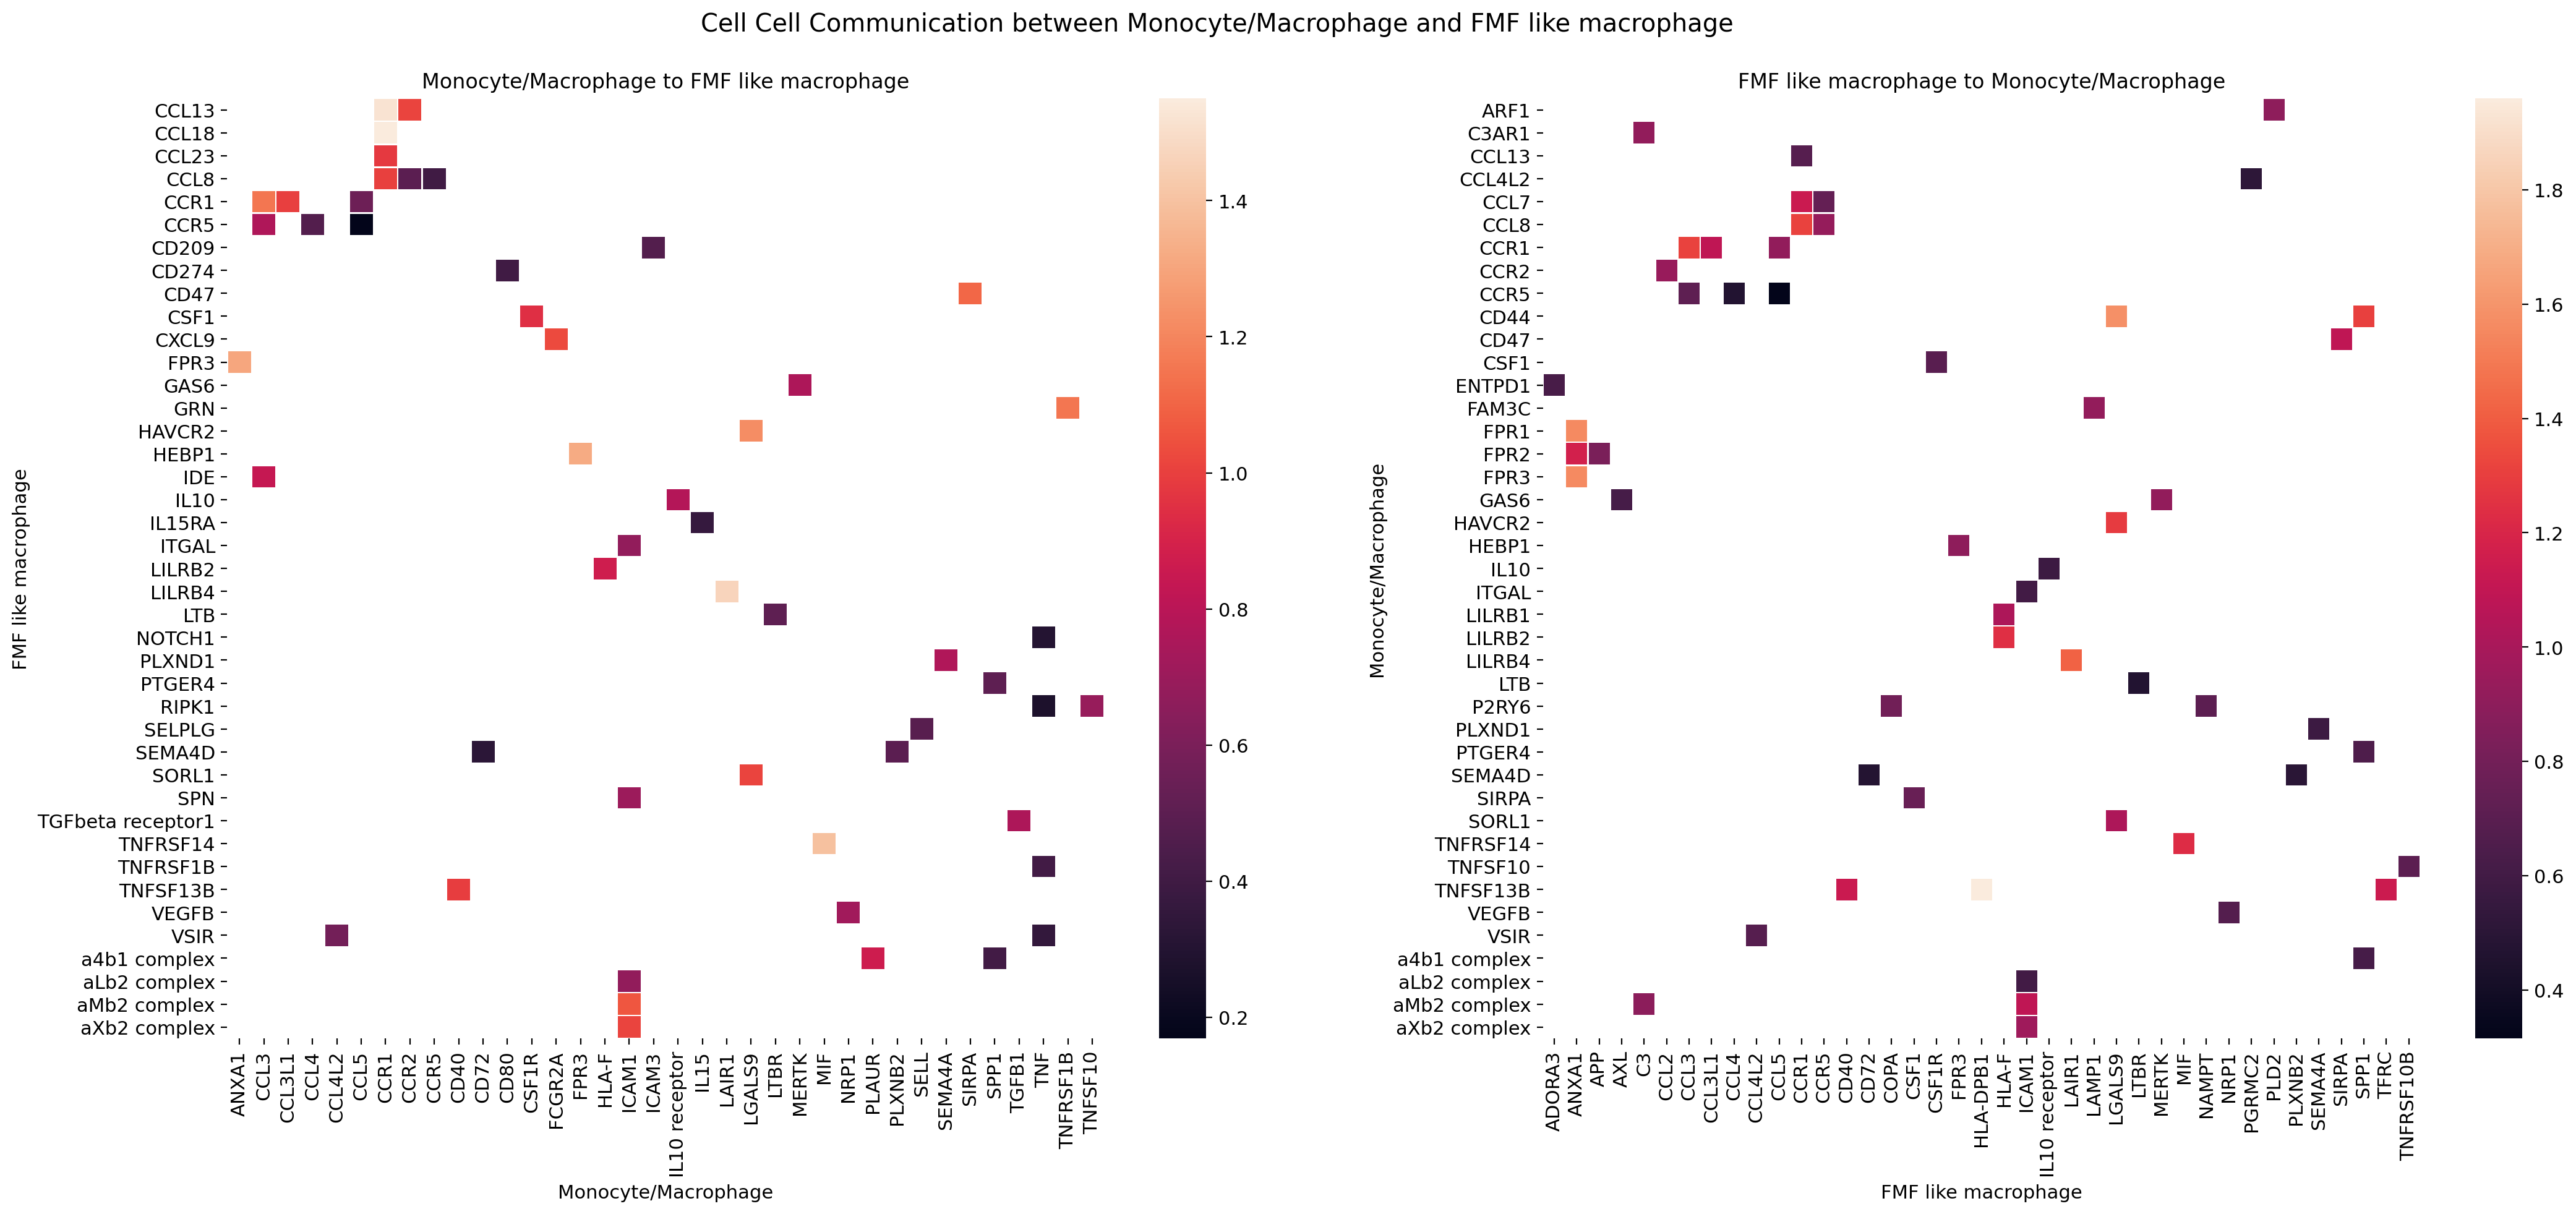

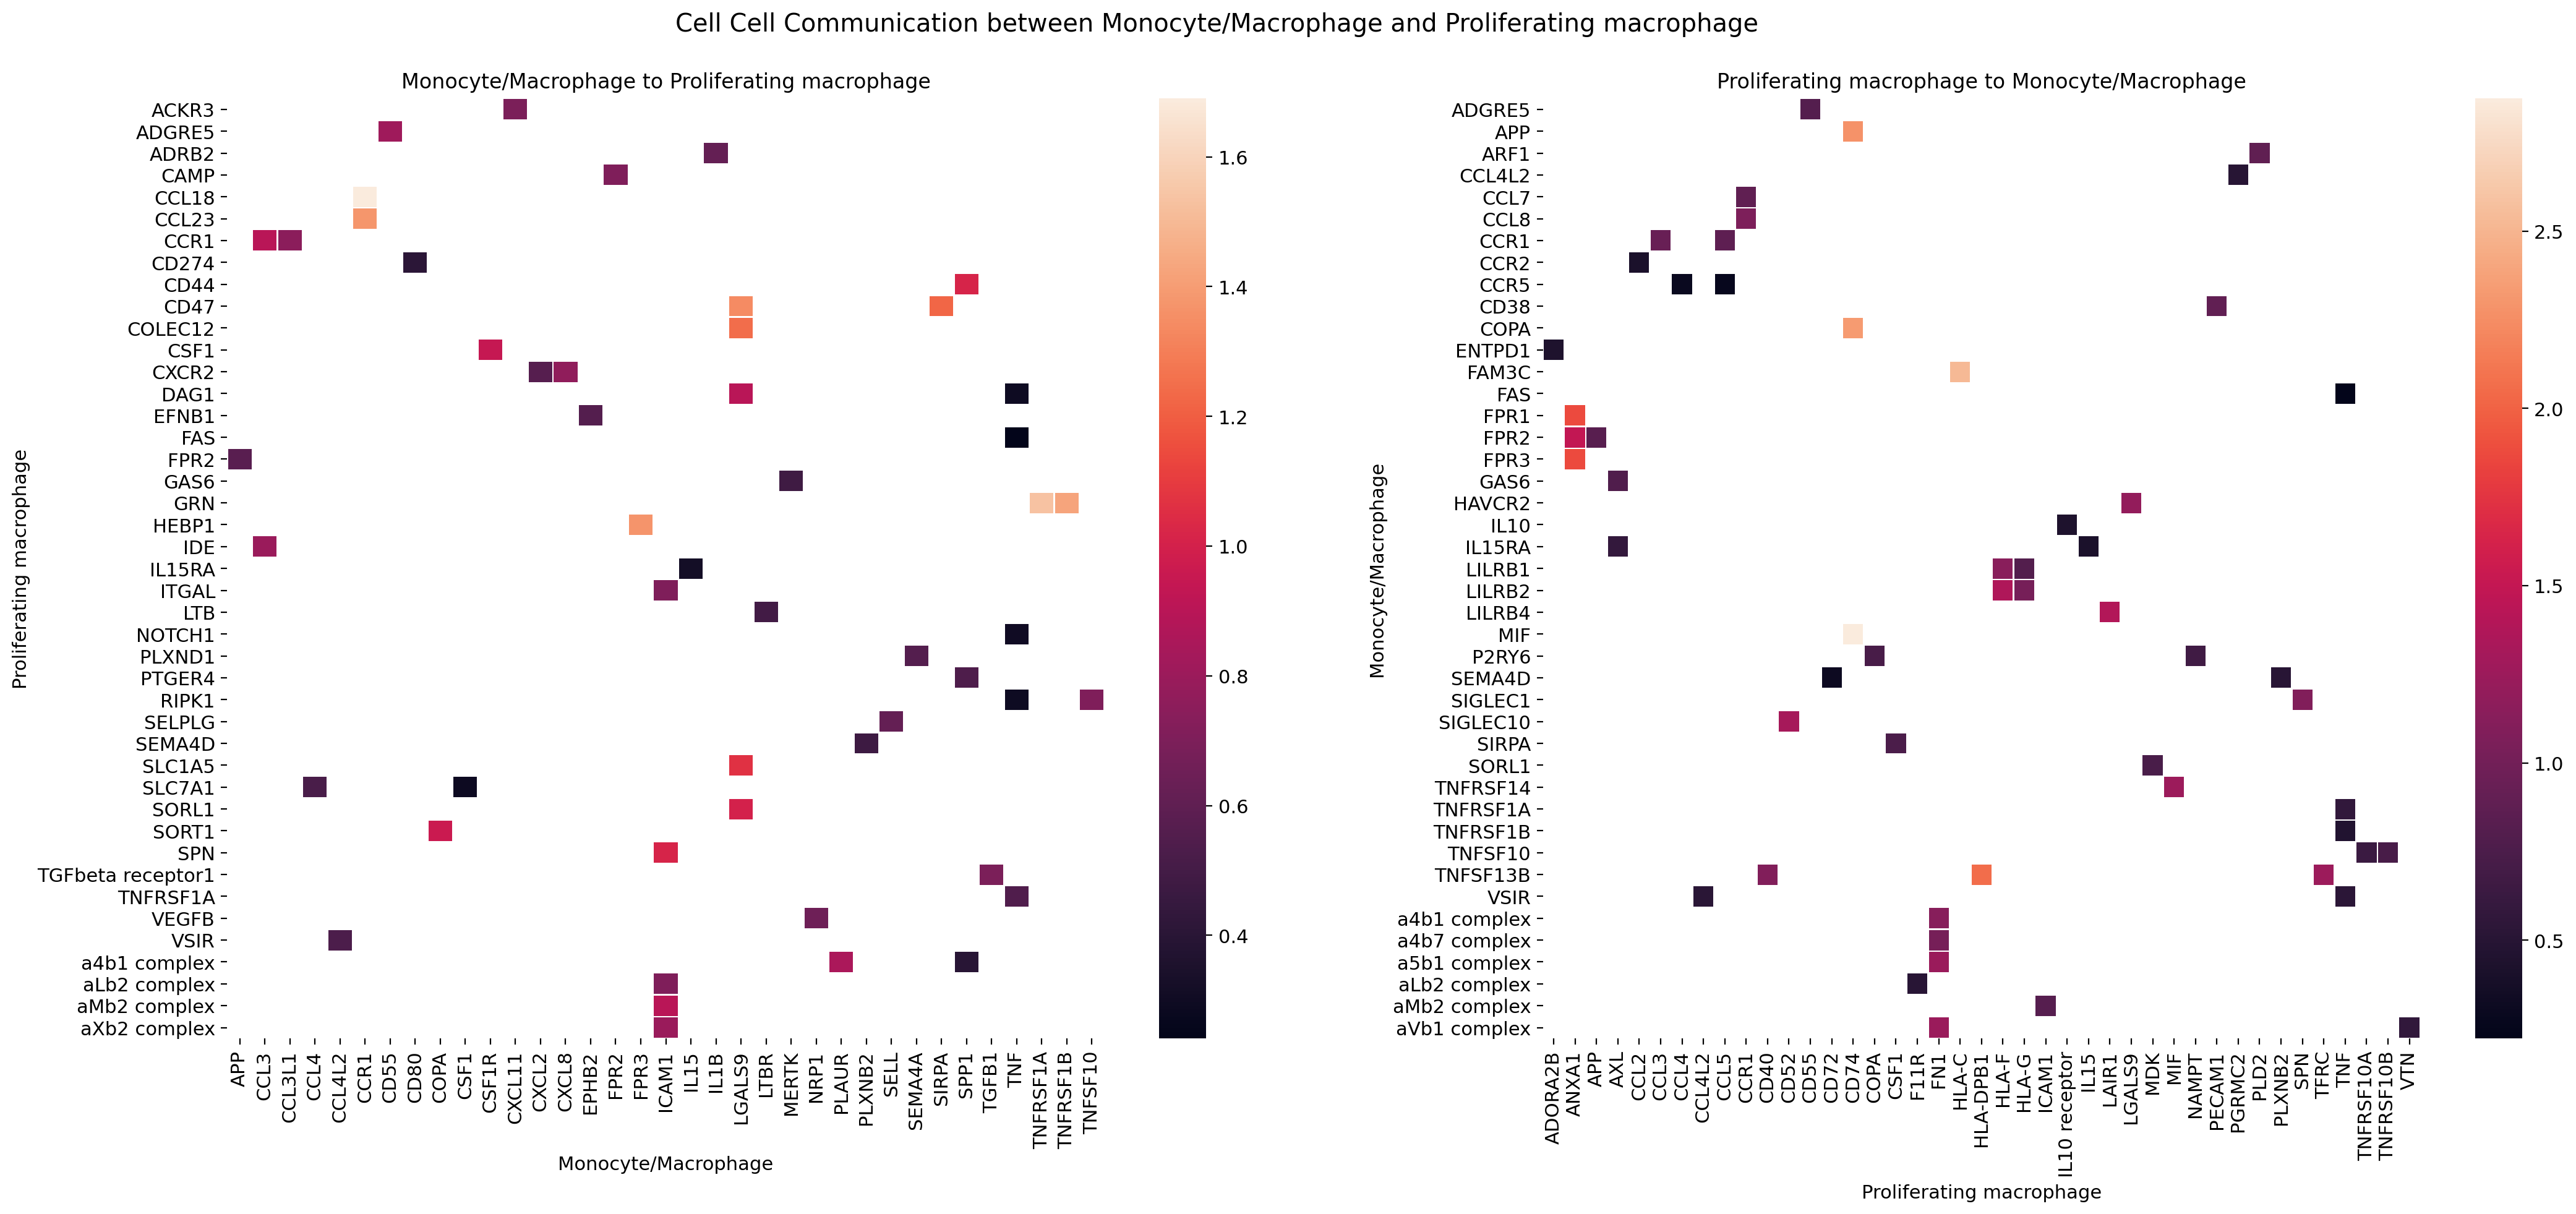

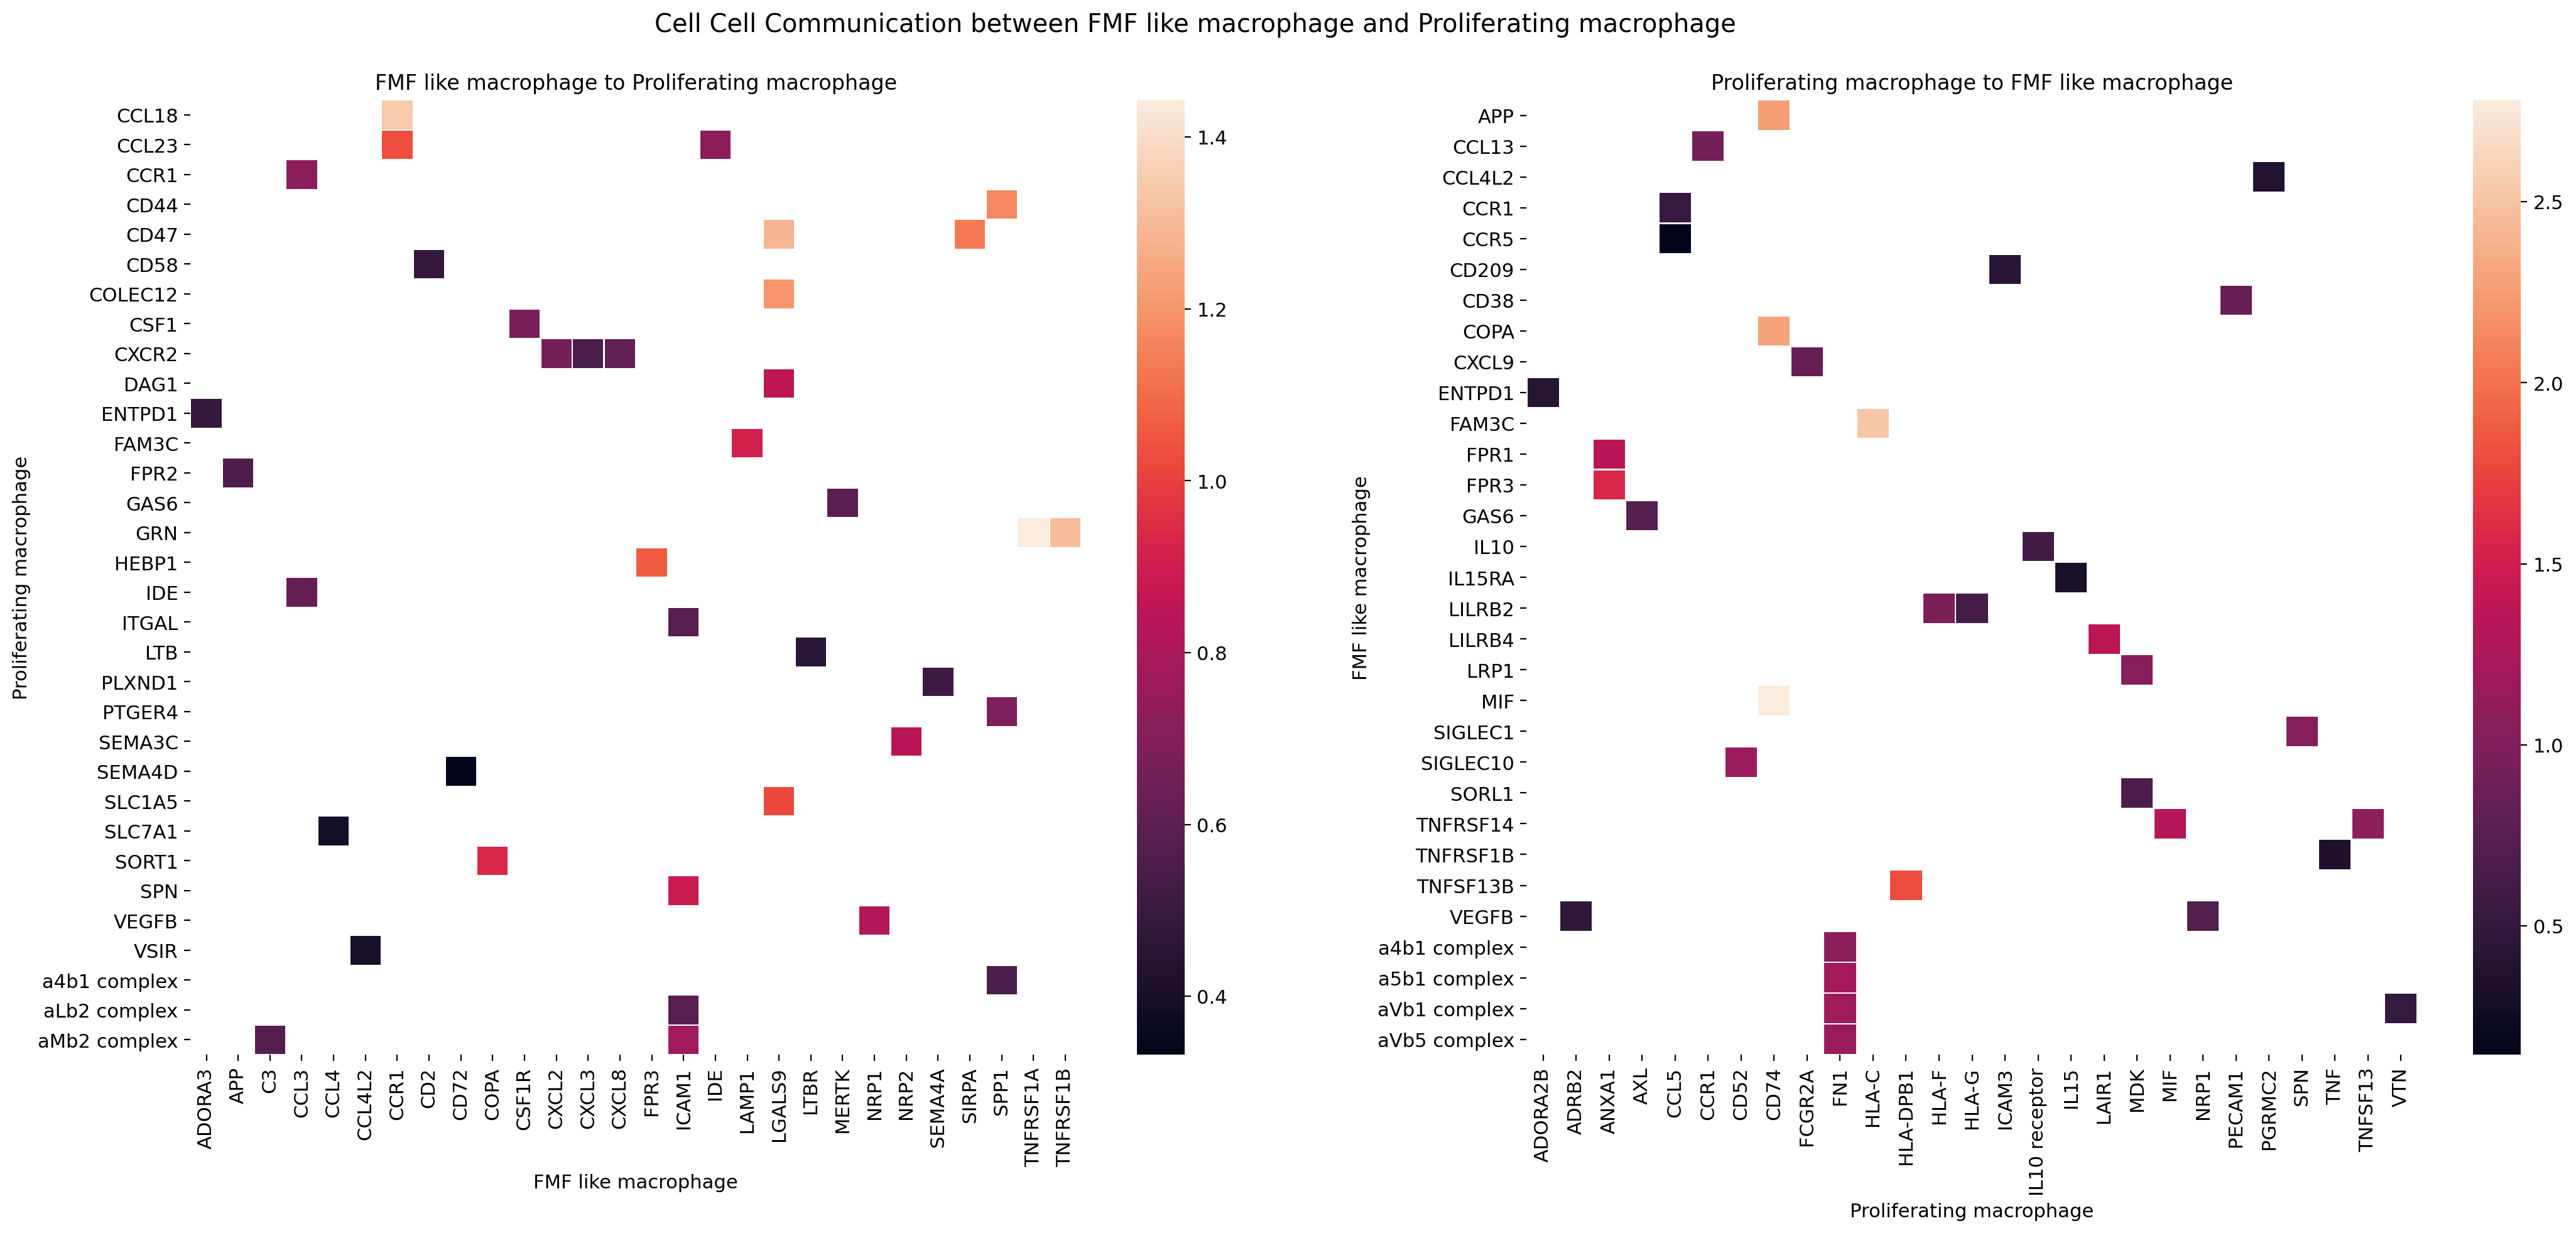

In [14]:
groups = sub.obs['Selected_group'].unique().tolist()

for combo in itertools.combinations(groups, 2):
    Plot_cluster_pair(combo,cpdb_mean)

In [6]:
adata = sub
groups = sub.obs['Selected_group'].unique().tolist()

## TF MF analysis

In [7]:
import dorothea
regulons = dorothea.load_regulons(
    ['A','B','C','D','E'],   # Which levels of confidence to use (A most confident, E least confident)
    organism='Human' # If working with mouse, set to Mouse
)

In [ ]:
dorothea.run(adata,        # Data to use
             regulons,     # Dorothea network
             center=True,  # Center gene expression by mean per cell
             num_perm=100, # Simulate m random activities
             norm=True,    # Normalize by number of edges to correct for large regulons
             scale=True,   # Scale values per feature so that values can be compared across cells
             use_raw=True, # Use raw adata, where we have the lognorm gene expression
             min_size=5,   # TF with less than 5 targets will be ignored
            )

16941 targets found
7 TFs with < 5 targets


 49%|████▉     | 49/100 [1:04:28<57:47, 67.98s/it]  

In [ ]:
TF_anndata = dorothea.extract(adata)

In [ ]:
TF_anndata.write(out_path+'/TF_anndata.h5ad')


## Top differential TF activity by each cell type V.S. rest of the cells

In [ ]:
def plot_tf(tf,raw=True):
    fig, ax = plt.subplots(2,2, figsize=(8,8), tight_layout=True, facecolor='white')
    ax = ax.flatten()
    fig.suptitle(tf, fontsize=16)
    sc.pl.violin(adata, keys=tf, groupby='Defined_groups', stripplot=False, ax=ax[0], show=False, use_raw=raw)
    ax[0].tick_params(axis='x', rotation=90, labelsize=10)
    ax[0].set_ylabel('')
    ax[0].set_xlabel('')
    ax[0].set_title('Gene expression')

    sc.pl.violin(dorothea.extract(adata), keys=tf, groupby='Defined_groups', stripplot=False, ax=ax[1], show=False)
    ax[1].tick_params(axis='x', rotation=90, labelsize=10)
    ax[1].set_ylabel('')
    ax[1].set_xlabel('')
    ax[1].set_title('TF activity')

    sc.pl.umap(adata, color=tf, return_fig=False, ax=ax[2], show=False, use_raw=raw,cmap='OrRd')
    ax[2].set_title('Gene expression')
    sc.pl.umap(dorothea.extract(adata), color=tf, vmin=-5, vmax=5, cmap='coolwarm', return_fig=False, ax=ax[3], show=False)
    ax[3].set_title('TF activity')

    plt.show()

In [ ]:
tfs = dict()
for g in groups:
    df = dorothea.rank_tfs_groups(adata, groupby='Defined_groups', group=g)
    df.to_csv(out_path+'/Differential_TF_mouse_human_homolog_'+g.replace(' ','').replace('/','_')+'.csv')
    tf4 = df.head(4).index.values
    top_tf =  df.head(1).index.values
    plot_tf(top_tf,raw=False)
    dorothea.check_regulon(adata, regulons, top_tf, 'Defined_groups',cmap='OrRd')
    dorothea.check_regulon(adata, regulons, top_tf, 'Defined_groups')
    tfs[g] = tf4
    


In [ ]:
sc.pl.matrixplot(dorothea.extract(adata), tfs,'Defined_groups' , dendrogram=True, cmap='coolwarm', vmin=-2, vmax=2)